# PyTorch for CIFAR10
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# resnet32 classifier

In [2]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.resnet import resnet32

resnet = resnet32()
print(resnet)

_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu_out): ReLU(inplace)
    )
    (1): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affi

# train reset20


In [3]:
%%time
opt = optim.SGD(resnet.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(resnet, opt, loss_fn)
def reduce_lr(epoch):
    if epoch <= 91:
        return 1
    elif epoch > 91 and epoch <= 137:
        return 0.1
    else:
        return 0.01
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = None
history = solver.train(epochs=182, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/182, lr:1.00e-01
[##################################################] 100.00% loss:1.7 acc:34.65% val_loss:1.6 val_acc:43.58%
Epoch: 2/182, lr:1.00e-01
[##################################################] 100.00% loss:1.2 acc:54.69% val_loss:1.3 val_acc:56.54%
Epoch: 3/182, lr:1.00e-01
[##################################################] 100.00% loss:0.99 acc:64.59% val_loss:1.0 val_acc:64.68%
Epoch: 4/182, lr:1.00e-01
[##################################################] 100.00% loss:0.84 acc:70.45% val_loss:0.86 val_acc:70.90%
Epoch: 5/182, lr:1.00e-01
[##################################################] 100.00% loss:0.74 acc:74.12% val_loss:0.82 val_acc:73.40%
Epoch: 6/182, lr:1.00e-01
[##################################################] 100.00% loss:0.66 acc:77.00% val_loss:0.7 val_acc:77.24%
Epoch: 7/182,

[##################################################] 100.00% loss:0.21 acc:92.47% val_loss:0.41 val_acc:87.52%
Epoch: 60/182, lr:1.00e-01
[##################################################] 100.00% loss:0.21 acc:92.55% val_loss:0.59 val_acc:84.20%
Epoch: 61/182, lr:1.00e-01
[##################################################] 100.00% loss:0.22 acc:92.37% val_loss:0.48 val_acc:87.26%
Epoch: 62/182, lr:1.00e-01
[##################################################] 100.00% loss:0.21 acc:92.73% val_loss:0.37 val_acc:88.58%
Epoch: 63/182, lr:1.00e-01
[##################################################] 100.00% loss:0.21 acc:92.61% val_loss:0.5 val_acc:85.42%
Epoch: 64/182, lr:1.00e-01
[##################################################] 100.00% loss:0.21 acc:92.51% val_loss:0.43 val_acc:87.00%
Epoch: 65/182, lr:1.00e-01
[##################################################] 100.00% loss:0.21 acc:92.49% val_loss:0.56 val_acc:83.76%
Epoch: 66/182, lr:1.00e-01
[##################################

[##################################################] 100.00% loss:0.019 acc:99.45% val_loss:0.38 val_acc:92.10%
Epoch: 119/182, lr:1.00e-02
[##################################################] 100.00% loss:0.02 acc:99.40% val_loss:0.36 val_acc:92.24%
Epoch: 120/182, lr:1.00e-02
[##################################################] 100.00% loss:0.019 acc:99.37% val_loss:0.35 val_acc:92.50%
Epoch: 121/182, lr:1.00e-02
[##################################################] 100.00% loss:0.02 acc:99.43%% val_loss:0.36 val_acc:92.38%
Epoch: 122/182, lr:1.00e-02
[##################################################] 100.00% loss:0.018 acc:99.48% val_loss:0.36 val_acc:92.22%
Epoch: 123/182, lr:1.00e-02
[##################################################] 100.00% loss:0.018 acc:99.42% val_loss:0.37 val_acc:92.46%
Epoch: 124/182, lr:1.00e-02
[##################################################] 100.00% loss:0.017 acc:99.46% val_loss:0.37 val_acc:92.42%
Epoch: 125/182, lr:1.00e-02
[####################

[##################################################] 100.00% loss:0.0065 acc:99.84% val_loss:0.38 val_acc:92.88%
Epoch: 177/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0069 acc:99.82% val_loss:0.39 val_acc:92.86%
Epoch: 178/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0072 acc:99.84% val_loss:0.39 val_acc:92.62%
Epoch: 179/182, lr:1.00e-03
[##################################################] 100.00% loss:0.007 acc:99.84% val_loss:0.39 val_acc:92.80%
Epoch: 180/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0074 acc:99.81% val_loss:0.39 val_acc:92.86%
Epoch: 181/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0069 acc:99.85% val_loss:0.39 val_acc:92.74%
Epoch: 182/182, lr:1.00e-03
[##################################################] 100.00% loss:0.0071 acc:99.83% val_loss:0.39 val_acc:92.82%
end training
CPU times: user 44min 51s, sy

# plot loss history
We check the classifier by plotting the loss and acc.

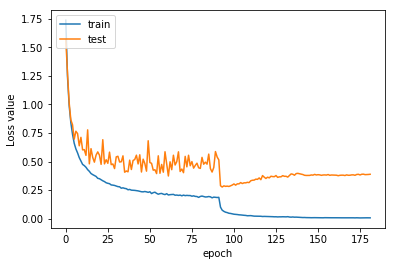

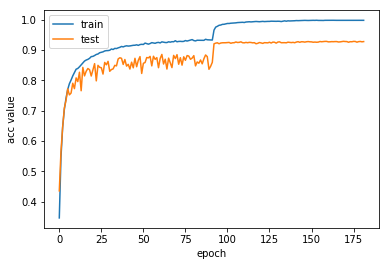

In [4]:
plot_history(history)

# test classifier
test on test data

In [5]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.39 test_acc:92.82%
